# Multilayer Perceptron

Nesse tutorial, vamos botar em prática o que foi visto nessa breve introdução de redes perceptron. Você poderá aprender como implementar um perceptron para o dataset iris seguindo este notebook. Tentarei explicar tudo em detalhes sobre a implementação deste notbook. Aproveite.

# Pacotes - pré-requisitos

Considerando que estamos usando o sistema Ubuntu, basta instalar o pip (sudo apt install python-pip), e logo depois:

In [ ]:
sudo pip install numpy
sudo pip install pandas
sudo pip install keras
sudo pip install theano
sudo pip install sklearn
sudo pip install np_utils
sudo pip install tensorflow
sudo pip install seaborn

# Dataset

O dataset das flores Iris ou Iris de Fisher é um dataset mutivariável introduzido pelo estatistico e biólogo britânico Ronald Fisher em um artigo de 1936. O dataset consiste de 50 exemplos de cada uma das 3 espécies de Iris (Iris setosa, Iris virginica e Iris versicolor). Quatro features foram medidas para cada amostra : o tamanho e comprimento das pétalas e sépala, em centimetros.

# Visualização

A melhor forma de inspecionarmos os dados é visualizando-os. Para fazer isso, utilizaremos a biblioteca seaborn para gerar um gráfico de dispersão — Scatter plot, em inglês. Isso nos permitirá verificar se os dados de medição das pétalas e sépalas estão bem distribuídos.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")


df = sns.load_dataset("iris")

sns.pairplot(df, hue="species")

plt.show()

<Figure size 1130.25x1000 with 20 Axes>

![distribuicao_dados.png](Imagens/distribuicao_dados.png)
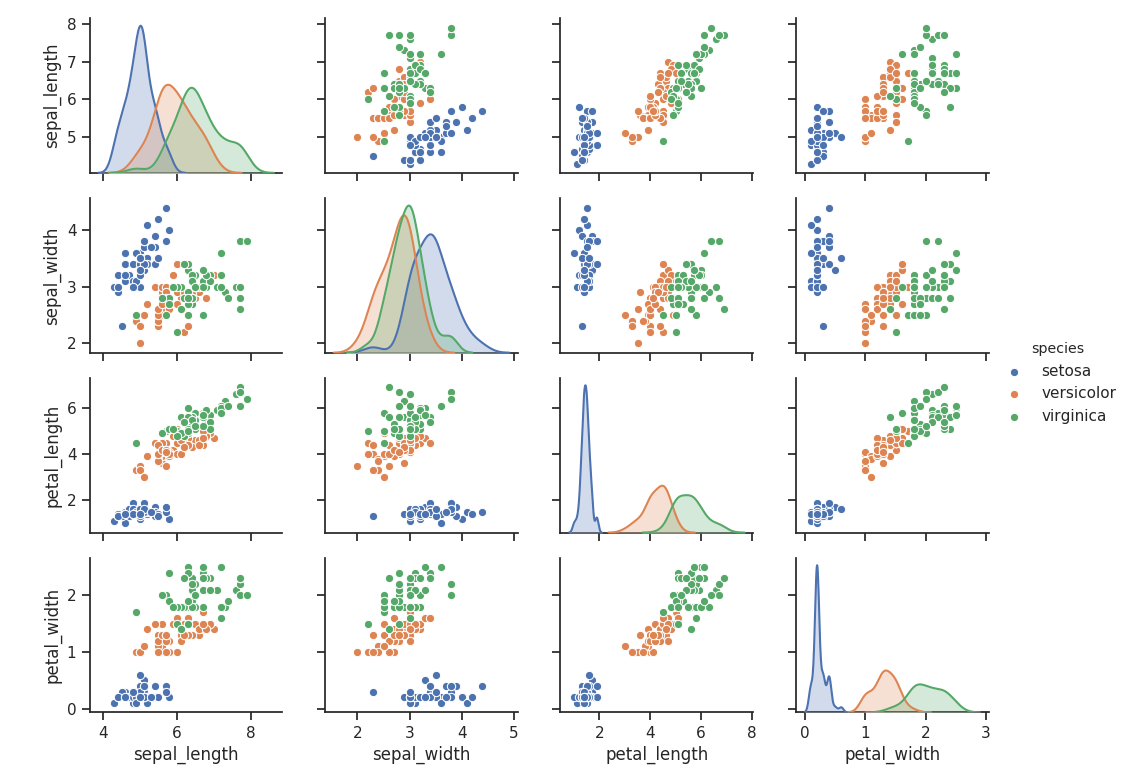

Como podemos ver nos gráficos, os dados parecem estar muito bem distribuídos. Isso permitirá uma precisão maior do modelo, uma vez que as informações são bem variadas para cada tipo de Íris. Imagine, por exemplo, se as flores da espécia Setosa tivessem as mesmas medidas da Versicolor. Isso faria com que nosso modelo tivesse dificuldades em prever novas flores inseridas mais tarde.

# Perceptron

In [13]:
import numpy
import pandas
import tensorflow
from keras.models import Model
from keras.layers import Dense,Input
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
import random
from random import randrange

Usando o comando load_dataset("iris") da biblioteca seaborn, nós carregamos o dataset Iris na variável df. Há no total 4 variáveis de entrada e uma variável de saída (última coluna). Vamos separar o dataset em variaveis de entrada (X) e uma classe de sáida (Y).

In [14]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y = dataset[:,4]

Segue uma visualização dos 4 primeiros elementos do dataset.

In [15]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


Segue também uma visualização da classe de 20 elementos aleatoriamente selecionados.

In [16]:
random_population = random.sample(population=list(Y), k=20)
print(random_population)

['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'setosa', 'setosa']


# Encoder

Para generalização e análise, será convertidos os 3 rotulos em números discretos. Esta operação seŕa feita pela classe LabelEncoder.

In [17]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

print(encoded_Y)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# One hot encoder

A variáveis de saída contém 3 diferentes valores. Quando modelamos um problema de classificação multiclasse usando redes neurais, é uma boa prática tranformar a sáida em um vetor contendo valores de cada classe associados a uma matriz de boleanos, onde cada variável representa se o elemento é daquela classe ou não. Isto é chamado de one hot encoding.

Por exemplo temos:

![one-hot-encoding.png](Imagens/one-hot-encoding.png)
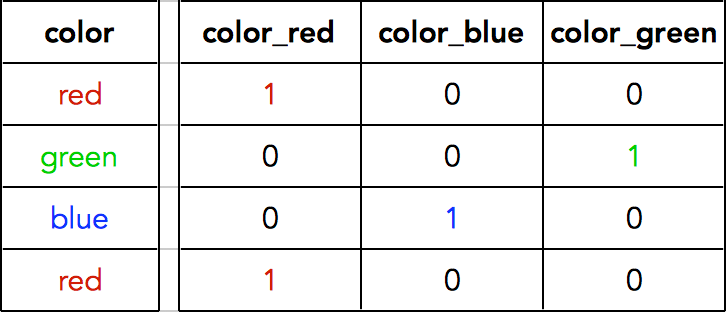

Nesse caso, foram mapeados da seguinte forma :

| Classe          | Rótulo | One hot encoder  |
|-----------------|--------|------------------|
| Iris-setosa     | 0      | [1.0 , 0.0, 0.0] |
| Iris-virginica  | 1      | [0.0 , 1.0, 0.0] |
| Iris-versicolor | 2      | [0.0 , 0.0, 1.0] |

In [18]:
dummy_y = np_utils.to_categorical(encoded_Y)
random_population = random.sample(population=dummy_y.tolist(), k=20)
print(random_population)

[[0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]


# Modelo

# Keras Dense()

![softmax.png](Imagens/softmax.png)
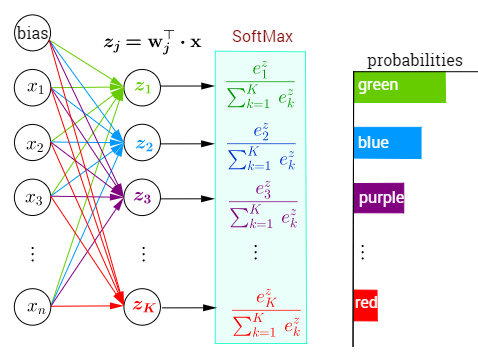

Consiste na criação de uma camada com neurônios conectados. Para este exemplo criaremos uma camada com somente um neurônio (perceptron) com entradas (features do dataset) e saídas (representando cada classe possível). Normalmente se utiliza para a última camada uma função de ativação softmax, para normalização da saída entre 0 ou 1. Com isso, podemos interpretar a saída da camada como sendo a probabilidade de uma entrada pertencer a cada classe.

In [23]:
def baseline_model():
    
    inputs = Input(shape=(4,))
    x = Dense(1, activation = 'relu')(inputs)
    outputs = Dense(3, activation='softmax')(x)
    
    #criando o modelo
    model = Model(inputs=inputs,outputs=outputs)
    
    # compilar modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [24]:
def baseline_model_MLP():
    
    inputs = Input(shape=(4,))
    x = Dense(8, activation = 'relu')(inputs)
    outputs = Dense(3, activation='softmax')(x)
    
    #criando o modelo
    model = Model(inputs=inputs,outputs=outputs)
    
    # compilar modelo
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [25]:
# Treinamento do modelo
estimator = KerasClassifier(build_fn=baseline_model_MLP, epochs=200, batch_size=5, verbose=0)

# Kfold

A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição. Busca-se então estimar o quão preciso é este modelo na prática, ou seja, o seu desempenho para um novo conjunto de dados.

O conceito central das técnicas de validação cruzada é o particionamento do conjunto de dados em subconjuntos mutualmente exclusivos, e posteriormente, utiliza-se alguns destes subconjuntos para a estimação dos parâmetros do modelo (dados de treinamento) e o restante dos subconjuntos (dados de validação ou de teste) são empregados na validação do modelo.

![k-fold-diagram.png](Imagens/k-fold-diagram.png)
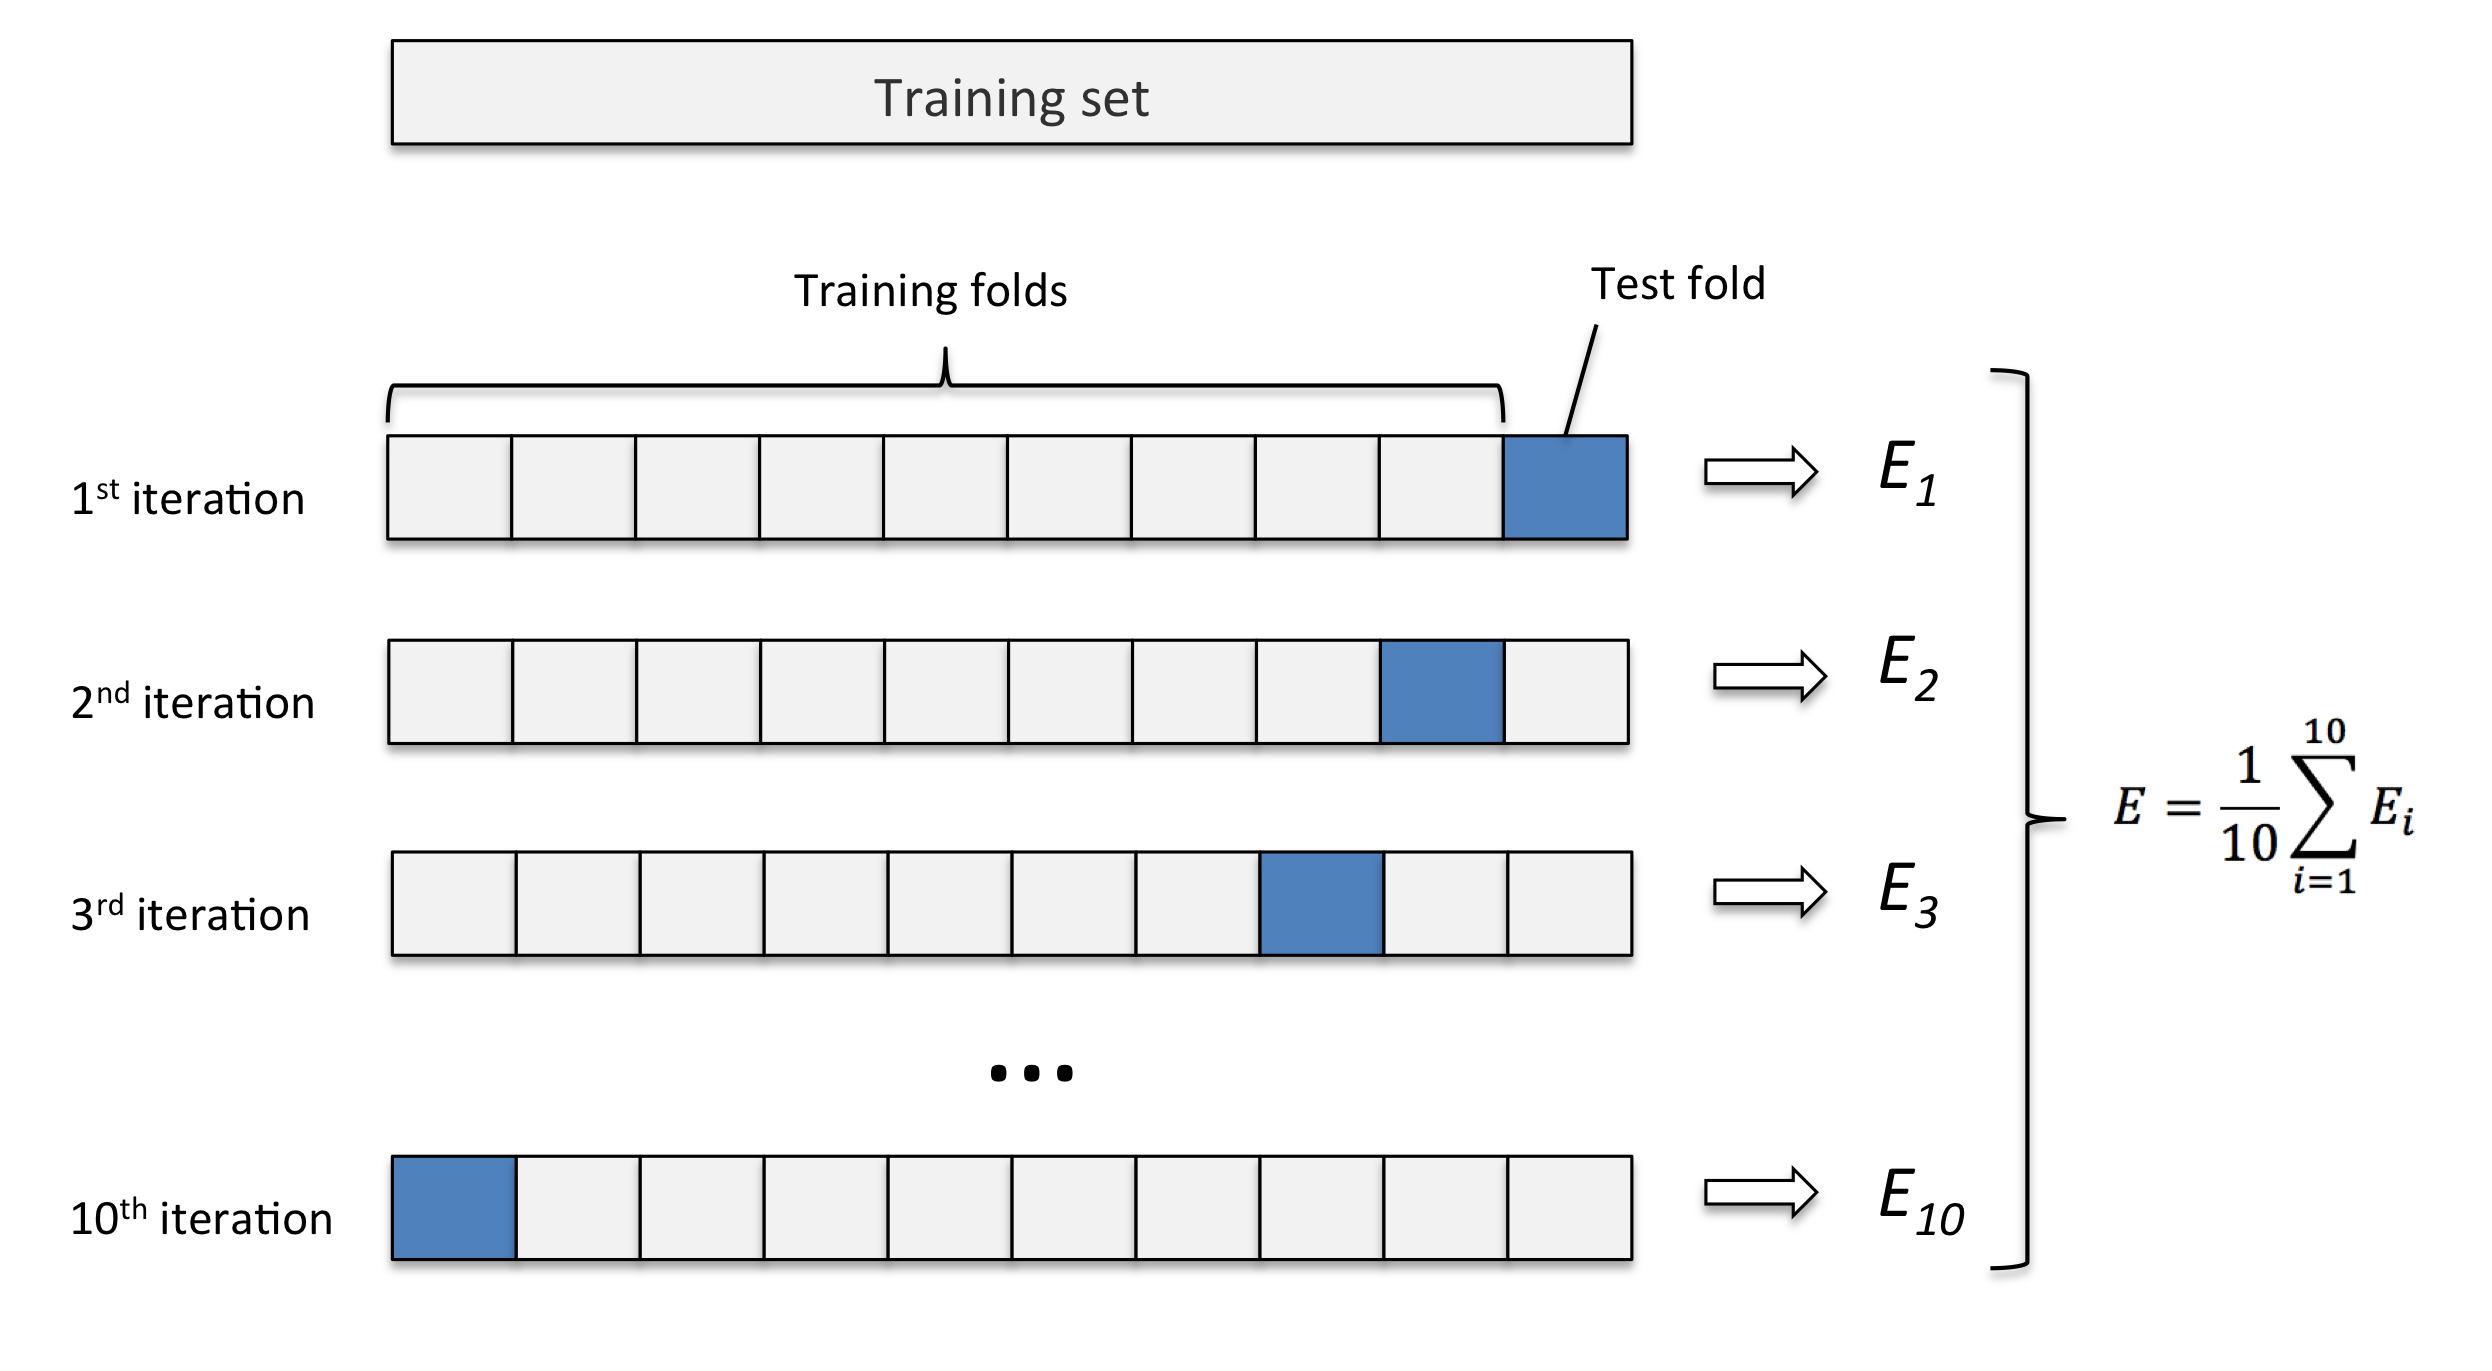

In [26]:
kfold = KFold(n_splits=10, shuffle=True)

results = cross_val_score(estimator, X, dummy_y, cv=kfold)

print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 96.67% (3.33%)
